# Übung: Clustering mit DBSCAN

**Ziel dieser Übung:**
Lernen Sie den DBSCAN-Algorithmus (Density-Based Spatial Clustering of Applications mit Noise) an ausgesuchten Daten anzuwenden.

**Datensatz:**
Verwenden Sie synthetische Mond-Daten (`make_moons`) aus `sklearn.datasets`, um nicht-lineare Strukturen und Ausreißer zu identifizieren.

**Dauer:** ca. 30 Minuten
**Voraussetzungen:** Python, scikit-learn, pandas, matplotlib

## 1. Daten erzeugen und visualisieren

**Aufgabe 1:**
1. Erzeugen Sie 500 Datenpunkte mit `make_moons(n_samples=500, noise=0.05, random_state=42)`.
2. Speichern Sie die Koordinaten in einem Array `data`.
3. Erstellen Sie ein Streudiagramm der Punkte und beschreiben Sie kurz die erkennbaren Cluster-Strukturen.


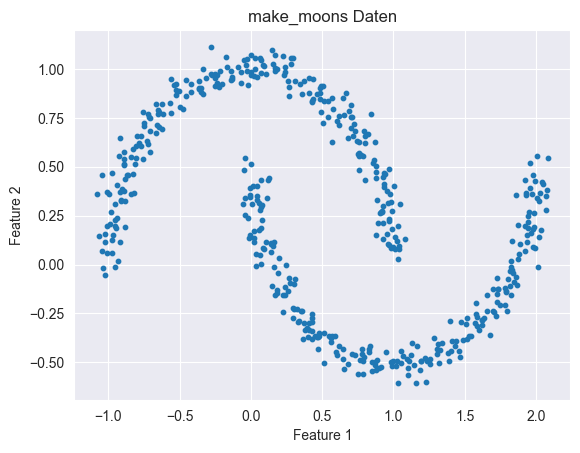

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

data, labels_true = make_moons(n_samples=500, noise=0.05, random_state=42)

plt.scatter(data[:, 0], data[:, 1], s=10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('make_moons Daten')
plt.show()

## 2. Daten standardisieren

**Aufgabe 2:**
- Nutzen Sie `StandardScaler` aus `sklearn.preprocessing`, um `data` zu standardisieren und speichern Sie das Ergebnis in `data_scaled`.
- Geben Sie Mittelwert und Standardabweichung für jede Dimension aus, um die Standardisierung zu überprüfen.


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

print('Mittelwerte:', data_scaled.mean(axis=0).round(2))
print('Std-Abw.:', data_scaled.std(axis=0).round(2))

Mittelwerte: [-0.  0.]
Std-Abw.: [1. 1.]


## 3. Parameterraster: eps und min_samples

DBSCAN benötigt zwei Parameter:
- `eps`: Radius für Nachbarschaft.
- `min_samples`: Mindestzahl an Punkten im Radius.

Der Silhouette-Score misst für jeden Punkt, wie gut er zu seinem eigenen Cluster passt im Vergleich zum benachbarten Cluster.
- Formell ist er definiert als (b(i) - a(i)) / max(a(i), b(i)), wobei
  - a(i) = durchschnittliche Distanz zu allen anderen Punkten im gleichen Cluster
  - b(i) = niedrigste durchschnittliche Distanz zu einem anderen Cluster
- Werte liegen zwischen -1 und 1:
  - Nahe 1: klare Zuordnung zum eigenen Cluster
  - Nahe 0: Punkt liegt an der Grenze zwischen Clustern
  - Nahe -1: mögliche Fehlzuordnung

**Aufgabe 3:**
1. Definieren Sie ein Raster für `eps` (z. B. [0.1, 0.2, 0.3, 0.4]) und für `min_samples` (z. B. [3, 5, 7]).
2. Führen Sie für jede Kombination DBSCAN durch.
3. Erfassen Sie in einer Tabelle:
   - Anzahl der gefundenen Cluster (ausgenommen Rauschen).
   - Silhouette-Score (nur wenn ≥2 Cluster vorhanden).
4. Visualisieren Sie Ihre Ergebnisse als Tabelle oder Heatmap.

    eps  min_samples  n_clusters  silhouette
0   0.1            3          11    0.135483
1   0.1            5          15    0.146570
2   0.1            7          23    0.193598
3   0.2            3           2    0.389338
4   0.2            5           2    0.389338
5   0.2            7           2    0.257486
6   0.3            3           2    0.389338
7   0.3            5           2    0.389338
8   0.3            7           2    0.389338
9   0.4            3           2    0.389338
10  0.4            5           2    0.389338
11  0.4            7           2    0.389338


/Users/nils/projects/fom/repos/exercise-fom-ai-bi/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/nils/projects/fom/repos/exercise-fom-ai-bi/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nils/projects/fom/repos/exercise-fom-ai-bi/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/nils/projects/fom/repos/exercise-fom-ai-bi/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/nils/projects/fom/repos/exercise-fom-ai-bi/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nils/projects/fom/repos/exercise-fom-ai-bi/.venv/lib/python3.13/site-packages/sklearn/utils/extm

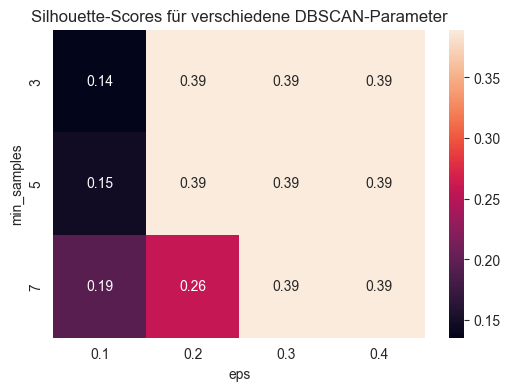

In [16]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_values = [0.1, 0.2, 0.3, 0.4]
min_samples_values = [3, 5, 7]
results = []
for eps in eps_values:
    for ms in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=ms)
        labels = db.fit_predict(data_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters >= 2:
            score = silhouette_score(data_scaled, labels)
        else:
            score = None

        results.append({
            'eps': eps,
            'min_samples': ms,
            'n_clusters': n_clusters,
            'silhouette': score
        })

df_results = pd.DataFrame(results)
print(df_results)

import seaborn as sns
import matplotlib.pyplot as plt
pivot = df_results.pivot(index='min_samples', columns='eps', values='silhouette')
plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt='.2f',)
plt.title('Silhouette-Scores für verschiedene DBSCAN-Parameter')
plt.xlabel('eps')
plt.ylabel('min_samples')
plt.show()

## 4. DBSCAN mit gewählten Parametern und Visualisierung

**Aufgabe 4:**
1. Wählen Sie aus Ihren Ergebnissen eine Kombination (`eps`, `min_samples`), die eine gute Silhouette liefert.
2. Führen Sie DBSCAN mit diesen Parametern erneut durch und erzeugen Sie ein Streudiagramm, in dem Punkte nach ihrem Cluster-Label gefärbt werden (`-1` für Rauschen).
3. Kommentieren Sie, wie gut DBSCAN die Mond-Struktur erfasst und wie viele Ausreißer identifiziert wurden.

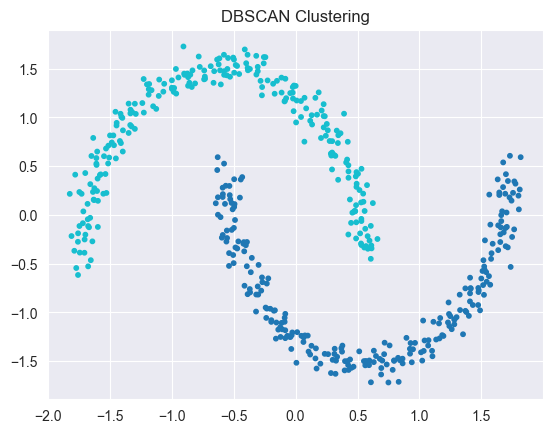

In [17]:
db_final = DBSCAN(eps=0.4, min_samples=5)
labels_final = db_final.fit_predict(data_scaled)

plt.scatter(data_scaled[:,0], data_scaled[:,1], c=labels_final, cmap='tab10', s=10)
plt.title('DBSCAN Clustering')
plt.show()

## 5. Reflexion

- Erläutern Sie, wie `eps` und `min_samples` die Anzahl der Cluster und erkannte Ausreißer beeinflussen.
- Diskutieren Sie Vorteile von DBSCAN gegenüber K-Means (z. B. Formenfreiheit, Ausreißer-Erkennung).
- Nennen Sie Anwendungsfälle, in denen Sie DBSCAN aufgrund seiner Eigenschaften bevorzugen würden.